In [1]:
import mnist
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(28*28,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,2),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(2,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,28*28),
            torch.nn.Unflatten(-1,(28,28))
        )
    def forward(self,x):
        code = self.encoder(x)
        reco = self.decoder(code)
        return code,reco

In [3]:
TRAIN = mnist.train_images()/256
TRAIN_labels = mnist.train_labels()
def sample_train(N, return_labels = False):
    idxs = np.random.choice(np.arange(len(TRAIN)), size = N) 
    images = TRAIN[idxs]
    labels = TRAIN_labels[idxs]
    if return_labels:
        return torch.FloatTensor(images), torch.FloatTensor(labels)
    return torch.FloatTensor(images)

i=0, loss=0.12273188680410385


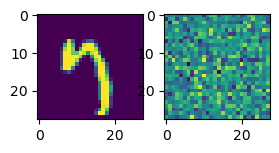

i=1000, loss=0.04511105269193649
i=2000, loss=0.041026219725608826
i=3000, loss=0.03841505944728851
i=4000, loss=0.039248764514923096
i=5000, loss=0.03764992207288742
i=6000, loss=0.03774316981434822
i=7000, loss=0.03733394667506218
i=8000, loss=0.03585571423172951
i=9000, loss=0.03671538829803467
i=10000, loss=0.035556212067604065


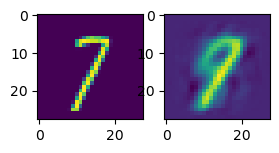

i=11000, loss=0.036791324615478516
i=12000, loss=0.03655096888542175
i=13000, loss=0.035971835255622864
i=14000, loss=0.03677920252084732
i=15000, loss=0.03648045286536217
i=16000, loss=0.03740730136632919
i=17000, loss=0.03701157495379448
i=18000, loss=0.035331159830093384
i=19000, loss=0.03533676639199257
i=20000, loss=0.03642338514328003


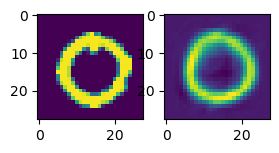

i=21000, loss=0.037126507610082626
i=22000, loss=0.03556383401155472
i=23000, loss=0.03567398339509964
i=24000, loss=0.03623895347118378
i=25000, loss=0.0327606238424778
i=26000, loss=0.03678223490715027
i=27000, loss=0.03418600559234619
i=28000, loss=0.03489340841770172
i=29000, loss=0.03496529534459114
i=30000, loss=0.03588132932782173


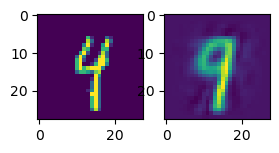

i=31000, loss=0.033404696732759476
i=32000, loss=0.034603167325258255
i=33000, loss=0.034306593239307404
i=34000, loss=0.03414967283606529
i=35000, loss=0.03471613675355911
i=36000, loss=0.033508963882923126
i=37000, loss=0.03381054103374481
i=38000, loss=0.03379974141716957
i=39000, loss=0.035208165645599365
i=40000, loss=0.03715830296278


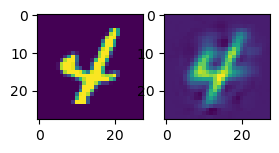

i=41000, loss=0.034751664847135544
i=42000, loss=0.03310691565275192
i=43000, loss=0.03604724630713463
i=44000, loss=0.03513120487332344
i=45000, loss=0.03484007716178894
i=46000, loss=0.03484831005334854
i=47000, loss=0.03530317172408104
i=48000, loss=0.035573720932006836
i=49000, loss=0.03195967152714729
i=50000, loss=0.03424276411533356


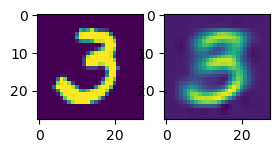

In [4]:
def plot(model,sample):
    f,axarr = plt.subplots(1,2)
    with torch.no_grad():
        code,reco = model(sample)
    axarr[0].imshow(sample[0])
    axarr[1].imshow(reco[0])
    #f.set_tight_layout(True)

def train():
    model = Autoencoder()
    opt = torch.optim.Adam(model.parameters(),1e-3)
    for i in range(50001):
        x = sample_train(200)
        code,reco = model(x)
        loss = torch.nn.functional.mse_loss(x,reco)
        loss.backward()
        opt.step()
        opt.zero_grad()
        if i % 1000 == 0:
            print(f"i={i}, loss={float(loss)}")
        if i % 10000 == 0:
            plot(model,sample_train(1))
            plt.gcf().set_size_inches(3,3)
            plt.show()
    return model
m = train()

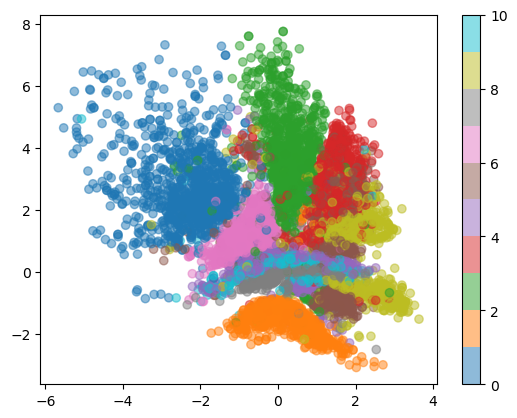

In [5]:
def plot_latent_space(model):
    x,y = sample_train(10000, return_labels = True)
    with torch.no_grad():
        codes,reco = model(torch.FloatTensor(x))
    plt.scatter(codes[:,0],codes[:,1],c = y,cmap = 'tab10', alpha = 0.5, vmin = 0, vmax = 10)
    plt.colorbar()
    plt.show()
    
plot_latent_space(m)

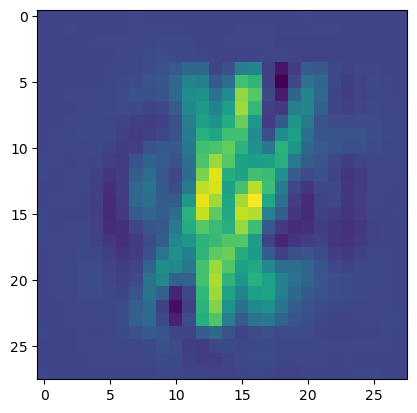

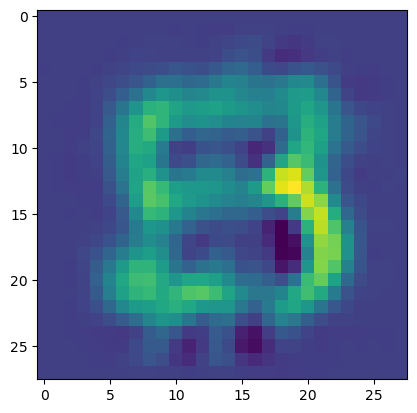

In [6]:
plt.imshow(m.decoder(torch.FloatTensor([[-0.5,-4]])).detach()[0])
plt.show()
plt.imshow(m.decoder(torch.FloatTensor([[5,5]])).detach()[0])
plt.show()